# OVERVIEW
>**Mô tả**

Dựa vào data là thông tin Tài chính - Chứng khoán của các Công ty niêm yết trên HOSE scrape từ các website, qua các bước xử lý - tính toán - tổng hợp thành 1 file data cuối cùng để làm dữ liệu đầu vào bài toán phân cụm (Clustering) các Công ty theo tốc độ tăng trưởng.

> **Mục tiêu**

Nhận diện các Nhóm Công ty cùng các đặc điểm - tốc độ tăng trưởng khác nhau từ đó đưa ra kế hoạch hành động phù hợp theo nhu cầu cụ thể và tình hình thực tế.


# PREPARATION
Phần này thực hiện các bước chuẩn bị cần thiết trước khi modeling như import thư viện, xem qua và kiểm tra data, feature scaling ...

## Import thư viện

In [1]:
#import thư viện
import numpy as np, pandas as pd
import matplotlib.pyplot as plt #Thư viện cho vẽ hình
import seaborn as sns
sns.set()
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120}) #Cài đặt kích thước cho toàn bộ các hình trong file notebook này giống nhau

In [2]:
# hse_comp = pd.read_csv('/content/B1_hse_comp.csv')
fdf = pd.read_csv('/content/B2_finance_record.csv')

# preview data
fdf.head()

,Mã,Công ty,Ngành,Khối lượng NY/ĐKGD,TtDT_QG4_YoY,TtDT_QG3_YoY,TtDT_QG2_YoY,TtDT_QG1_YoY,TtLN_QG4_YoY,TtLN_QG3_YoY,...,TtTV_QG1,TtEPS_QG3,TtEPS_QG2,TtEPS_QG1,TtBVPS_QG3,TtBVPS_QG2,TtBVPS_QG1,TtPE_QG3,TtPE_QG2,TtPE_QG1
0,AAA,Công ty cổ phần Nhựa An Phát Xanh,"Nhựa, cao su & sợi",382274496,-18.868967,-10.203656,-39.479924,7.582884,-261.482534,-38.815476,...,4.543175,-24.829157,-52.619590,-41.457859,1.028883,2.882112,4.543201,80.989082,233.461785,133.526012
1,AAM,Công ty Cổ phần Thủy sản Mekong,Nuôi trồng nông & hải sản,12346411,-30.904498,-45.596283,-40.072282,-39.190268,-22.452303,-41.004785,...,-3.077753,-5.071119,-52.133581,-73.840445,0.508754,-2.583670,-3.077460,5.790960,93.502825,250.988701
2,AAT,Công ty cổ phần Tiên Sơn Thanh Hoá,Hàng May mặc,70819103,296.405315,9.973297,-64.843500,-32.351401,28.544601,6876.190476,...,-0.871070,1.553672,-94.350282,-94.420904,-1.069242,-0.525998,-10.692420,-1.142857,2154.571429,1780.857143
3,ABR,Công ty Cổ phần Đầu tư Nhãn hiệu Việt,Tư vấn & Hỗ trợ KD,20000000,24.134354,19.057725,-17.763076,-77.114643,56.754899,56.347285,...,10.694462,11.164384,44.178082,34.452055,3.286055,8.671535,10.693723,-7.035176,5.862647,6.700168
4,ABS,Công ty Cổ phần Dịch vụ Nông nghiệp Bình Thuận,Phân phối hàng chuyên dụng,80000000,35.563790,-76.446245,13.498663,-14.795415,-81.701817,177.193979,...,-33.549887,23.076923,188.165680,172.485207,-37.479289,-33.697081,-33.548535,-11.269430,-54.468912,-53.367876


In [3]:
# xem thông tin chung
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mã                  389 non-null    object 
 1   Công ty             389 non-null    object 
 2   Ngành               389 non-null    object 
 3   Khối lượng NY/ĐKGD  389 non-null    int64  
 4   TtDT_QG4_YoY        389 non-null    float64
 5   TtDT_QG3_YoY        389 non-null    float64
 6   TtDT_QG2_YoY        389 non-null    float64
 7   TtDT_QG1_YoY        389 non-null    float64
 8   TtLN_QG4_YoY        389 non-null    float64
 9   TtLN_QG3_YoY        389 non-null    float64
 10  TtLN_QG2_YoY        389 non-null    float64
 11  TtLN_QG1_YoY        389 non-null    float64
 12  TtDT_QG3            389 non-null    float64
 13  TtDT_QG2            389 non-null    float64
 14  TtDT_QG1            389 non-null    float64
 15  TtLN_QG3            389 non-null    float64
 16  TtLN_QG2

DataFrame có 389 `row` và 33 `column`, trong đó:
- 1 `column` dạng int.
- 3 `column` dạng text.
- 29 `column` dạng float.




In [4]:
# xem số liệu thống kê các cột dạng số
fdf.describe(exclude = 'O')

,Khối lượng NY/ĐKGD,TtDT_QG4_YoY,TtDT_QG3_YoY,TtDT_QG2_YoY,TtDT_QG1_YoY,TtLN_QG4_YoY,TtLN_QG3_YoY,TtLN_QG2_YoY,TtLN_QG1_YoY,TtDT_QG3,...,TtTV_QG1,TtEPS_QG3,TtEPS_QG2,TtEPS_QG1,TtBVPS_QG3,TtBVPS_QG2,TtBVPS_QG1,TtPE_QG3,TtPE_QG2,TtPE_QG1
count,3.890000e+02,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,...,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000
mean,3.709506e+08,48.917162,119.278314,59.052553,7.358788,87.674867,-162.880008,-22.440323,-174.673805,-6.245878,...,1.724868,-24.616391,-51.361030,-49.832135,0.226453,-1.143339,-2.170596,38.805678,150.943735,169.111407
std,9.071625e+08,264.718780,2339.318163,1148.282922,172.205330,2229.667492,2730.051655,550.137535,2017.266961,124.573970,...,11.603423,153.466059,270.934108,293.513285,6.624959,9.392643,12.151704,173.787382,1004.232820,969.255396
min,6.134773e+06,-849.278663,-99.803904,-99.919325,-285.455450,-20477.164009,-49924.511931,-3426.118564,-34837.837838,-771.230283,...,-65.671914,-1452.830189,-3200.000000,-2984.615385,-37.479289,-46.740541,-67.087284,-89.978509,-98.682186,-99.194723
25%,3.153995e+07,-20.693859,-33.182176,-32.115604,-29.892830,-88.229128,-83.979657,-83.423478,-85.803280,-37.071208,...,-2.077490,-27.257143,-52.133581,-62.943633,-0.863315,-3.805162,-6.350726,-3.581267,0.000000,0.000000
50%,7.488356e+07,4.531169,-7.754702,-8.384804,-6.604631,-38.989142,-36.444740,-33.656907,-25.785482,-15.435221,...,1.202935,-7.395702,-18.940937,-24.627349,0.718250,0.144110,-0.227758,6.451613,22.666667,31.012658
75%,2.362412e+08,32.016769,19.495284,16.878831,13.995618,18.201520,7.426946,10.502223,19.215243,1.863676,...,5.658188,2.373057,1.700921,2.043213,2.468240,3.374148,3.995415,28.467153,73.567468,101.639344
max,6.743424e+09,2504.622946,46123.000000,22565.997131,3092.271705,30177.777778,10224.561404,6733.695652,4147.180193,1438.761116,...,72.929808,794.505495,1135.087719,1311.888112,49.175901,47.686004,48.598566,2107.411464,16755.440175,16755.440175


> Số liệu (trừ cột `Khối lượng NY/ĐKGD`) chênh lệch lớn nên cần scale Features trước khi truyền vào model.

In [5]:
# kiểm tra null
fdf.isnull().sum().sum()

0

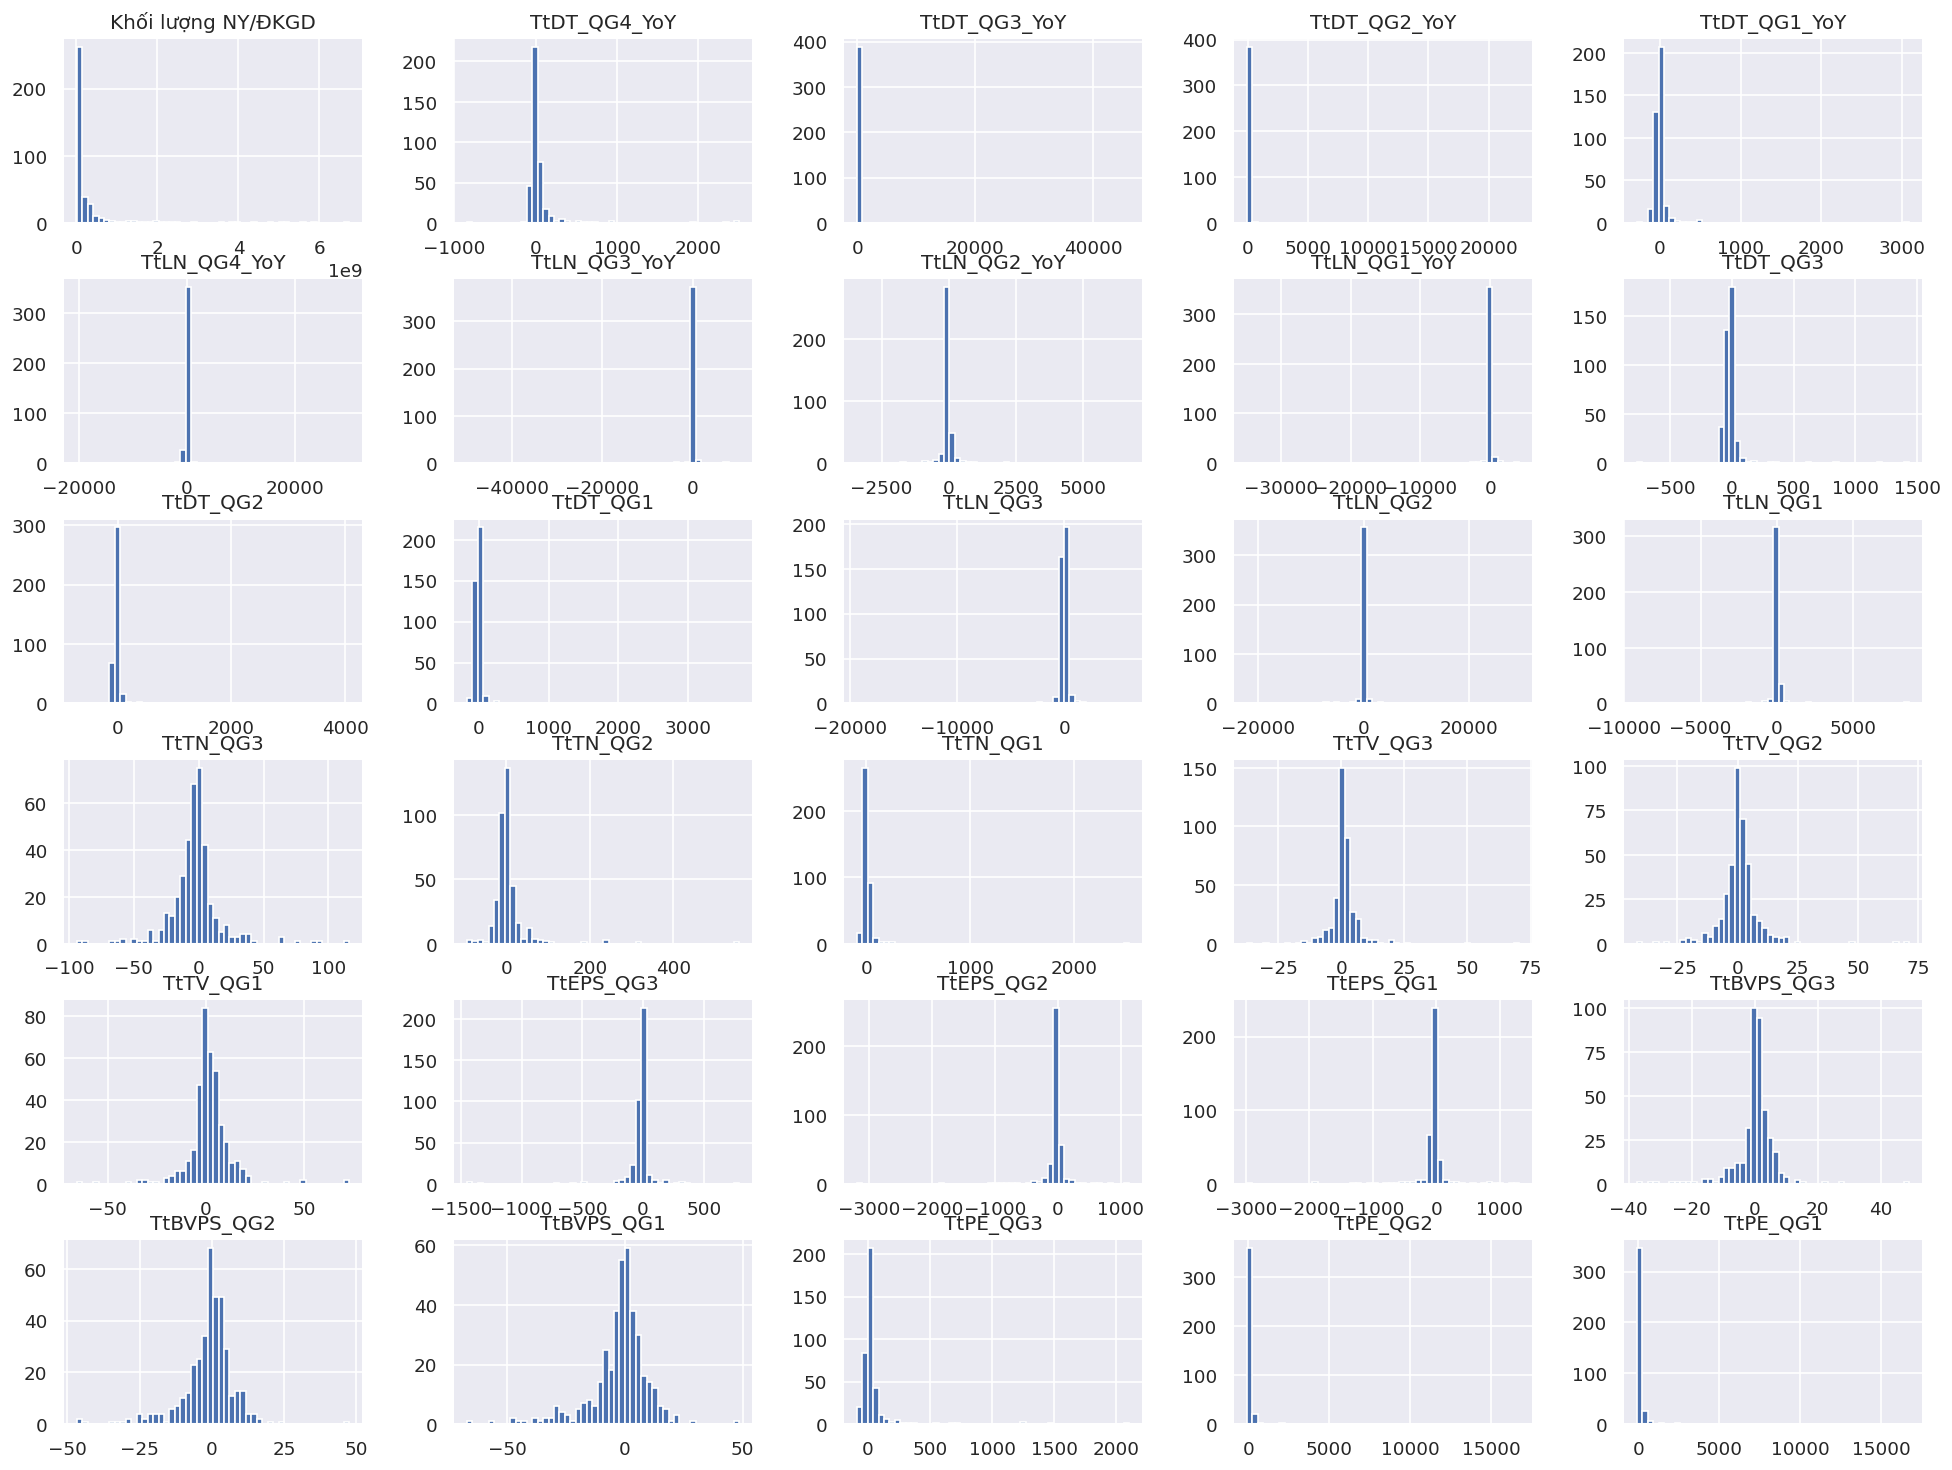

In [6]:
# vẽ biểu đồ histogram thể hiện phân bổ giá trị các column
fdf.hist(bins=50, figsize=(20,15))
plt.show()

## Feature Scaling

In [7]:
X = fdf.iloc[:, 4:]
X.head()

,TtDT_QG4_YoY,TtDT_QG3_YoY,TtDT_QG2_YoY,TtDT_QG1_YoY,TtLN_QG4_YoY,TtLN_QG3_YoY,TtLN_QG2_YoY,TtLN_QG1_YoY,TtDT_QG3,TtDT_QG2,...,TtTV_QG1,TtEPS_QG3,TtEPS_QG2,TtEPS_QG1,TtBVPS_QG3,TtBVPS_QG2,TtBVPS_QG1,TtPE_QG3,TtPE_QG2,TtPE_QG1
0,-18.868967,-10.203656,-39.479924,7.582884,-261.482534,-38.815476,-49.221843,24.020234,6.169099,-18.060630,...,4.543175,-24.829157,-52.619590,-41.457859,1.028883,2.882112,4.543201,80.989082,233.461785,133.526012
1,-30.904498,-45.596283,-40.072282,-39.190268,-22.452303,-41.004785,-90.207412,-138.154426,-28.478430,-4.571078,...,-3.077753,-5.071119,-52.133581,-73.840445,0.508754,-2.583670,-3.077460,5.790960,93.502825,250.988701
2,296.405315,9.973297,-64.843500,-32.351401,28.544601,6876.190476,-98.105838,7.201309,-53.163094,-39.951388,...,-0.871070,1.553672,-94.350282,-94.420904,-1.069242,-0.525998,-10.692420,-1.142857,2154.571429,1780.857143
3,24.134354,19.057725,-17.763076,-77.114643,56.754899,56.347285,168.908741,-32.956532,-2.319265,-30.738961,...,10.694462,11.164384,44.178082,34.452055,3.286055,8.671535,10.693723,-7.035176,5.862647,6.700168
4,35.563790,-76.446245,13.498663,-14.795415,-81.701817,177.193979,538.437425,-78.254492,-89.842097,-13.557626,...,-33.549887,23.076923,188.165680,172.485207,-37.479289,-33.697081,-33.548535,-11.269430,-54.468912,-53.367876


In [8]:
# X = df.iloc[:, 1:].values # Dữ liệu cho training. phân loại (Không dùng cột CustomerID)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X) # Transform data để phù hợp với đầu vào của các hàm tính toán dưới đây
scaled_X

array([[-0.25639823, -0.05542159, -0.08591904, ...,  0.24304255,
         0.08227606, -0.03676144],
       [-0.30192212, -0.07057053, -0.08643557, ..., -0.19021654,
        -0.05727246,  0.08458321],
       [ 0.9361137 , -0.04678533, -0.10803575, ..., -0.2301662 ,
         1.9977519 ,  1.66501151],
       ...,
       [ 0.08246599, -0.04677597, -0.05423463, ..., -0.15289755,
        -0.15135449, -0.1599635 ],
       [-0.29816197, -0.05959955, -0.04757542, ..., -0.20679171,
        -0.1449958 , -0.15188449],
       [-0.38979934, -0.05541228, -0.02270744, ..., -0.24504298,
        -0.10914707, -0.11868182]])

# MODELING

## Hierarchical Clustering
Là cách phân cụm dựa trên Connectivity Model (Mô hình Liên Kết) > dễ hiểu, nhanh chóng và trực quan.

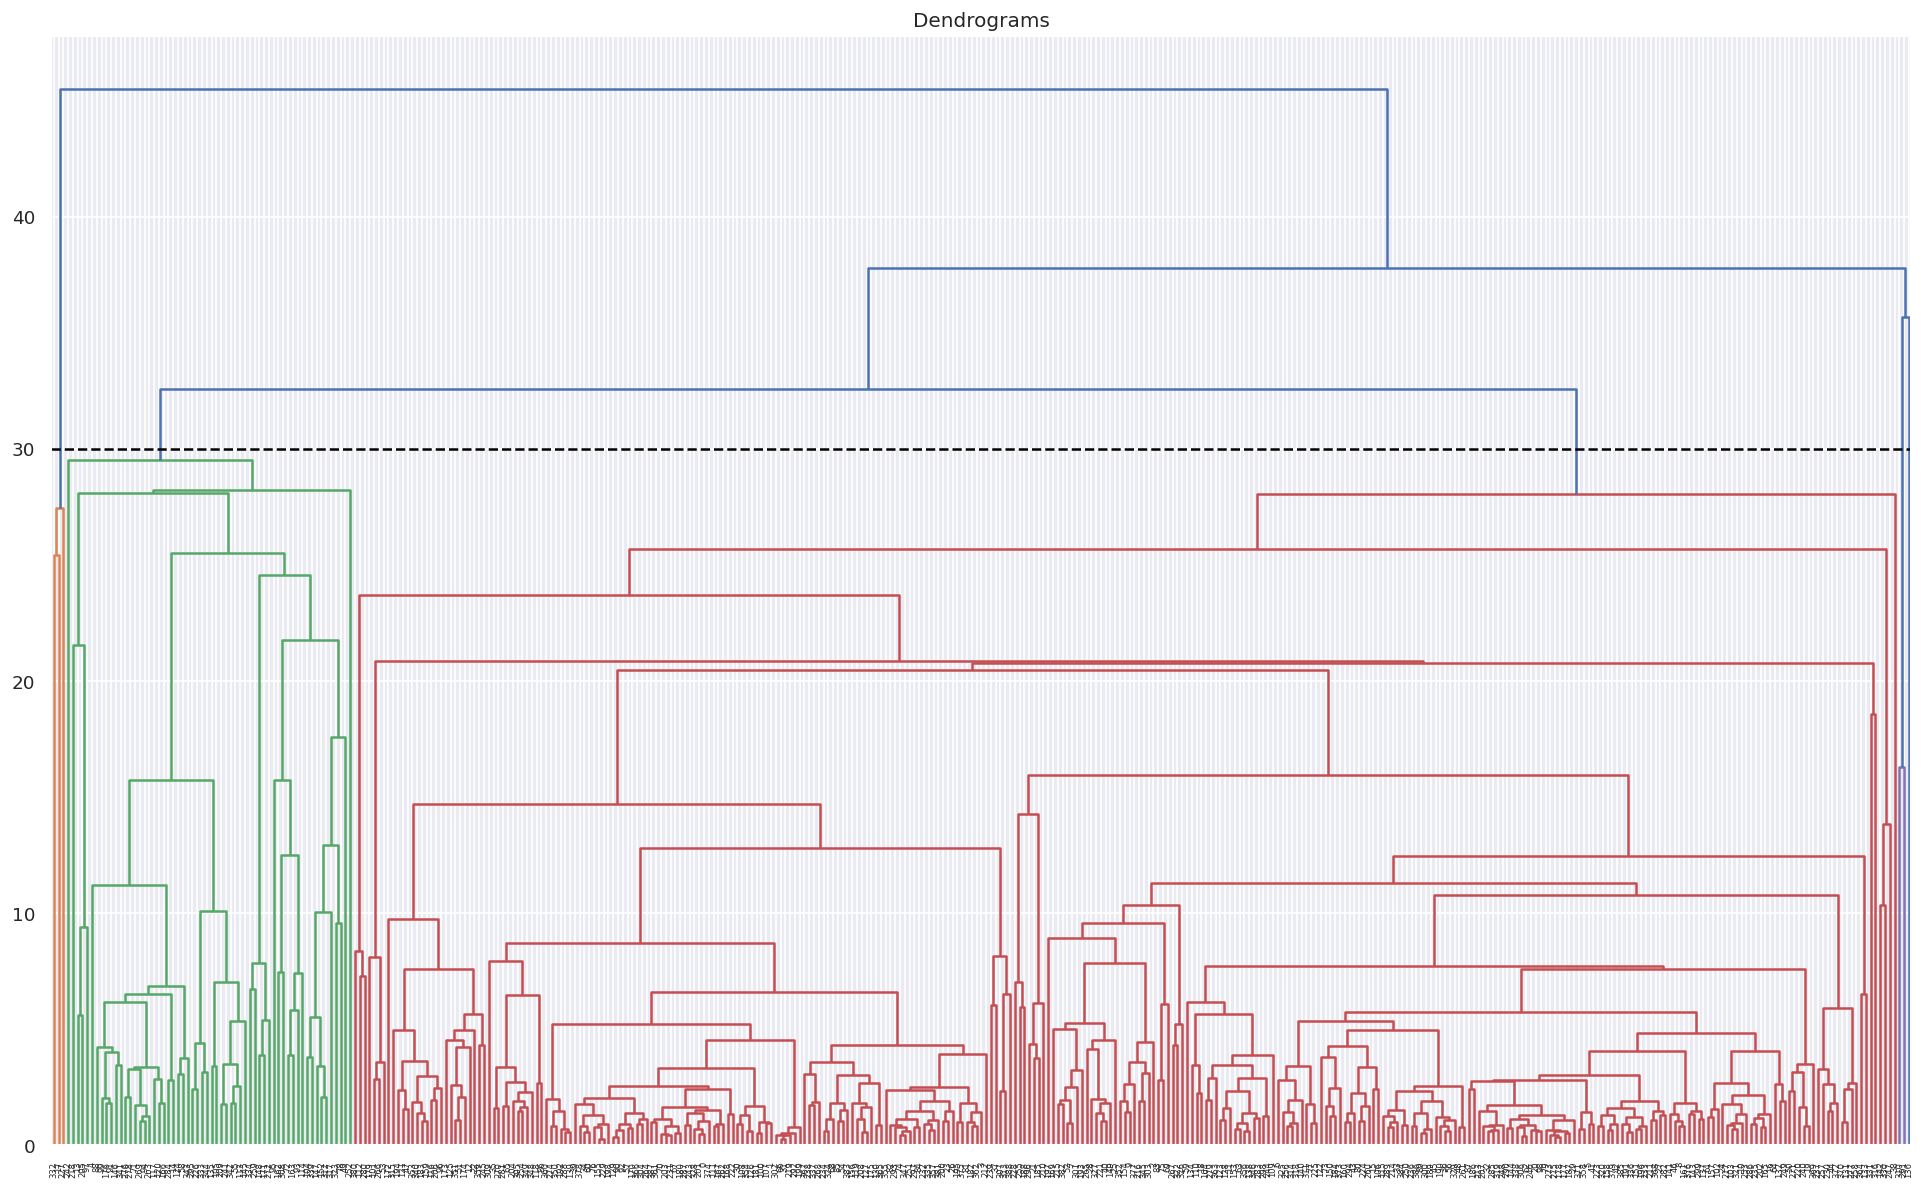

In [9]:
# import thư viện nối cụm & vẽ biểu đồ
from seaborn.matrix import dendrogram
import scipy.cluster.hierarchy as shc

# vẽ biểu đồ các cụm
plt.figure(figsize=(20,12), dpi=120)
plt.title("Dendrograms")
dendro = shc.dendrogram(shc.linkage(scaled_X, method='ward', metric='euclidean', optimal_ordering=True))
plt.axhline(y=30, color='black', linestyle='--')

Có thể chọn **K = 4 hoặc 5** theo đường màu đen cắt qua các cột để phân ra các cụm tương đối tách biệt.

## K-Means Clustering
Là cách phân cụm dựa trên Centroid Model (Mô hình Trọng Tâm) > dễ thực hiện và nhanh chóng.

### Import Library & Module

In [10]:
!pip install kneed

In [11]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score, calinski_harabasz_score

### Build model & Compute metrics
Sau đây chúng ta sẽ tính 3 metric để so sánh từ đó giúp xác định số cụm tối ưu (Optimal K) là:
1. The Elbow Method.
2. Silhouette Coefficient.
3. Calinski Harabaz Index.

In [12]:
# tạo list lưu các metric tính được
sil = [] # cho hệ số silhouette
wcss = [] # cho chỉ số within clusters sum of square (elbow method)
calinski = [] # cho điểm calinski (tỷ lệ giữa độ phân tán các cụm với độ tập trung từng cụm)

# tạo loop để build model cho các chỉ số k từ 2 > 20 và tính các hệ số trên với mỗi k
for k in range(2, 20):
#  kmeans = KMeans(n_clusters=k, random_state=0)
 kmeans = KMeans(n_clusters = k, init='k-means++', max_iter=300, n_init=10, random_state=0)
 kmeans.fit(scaled_X)

 sil_score = silhouette_score(scaled_X, kmeans.labels_)
 sil.append(sil_score)

 wcss.append(kmeans.inertia_)

 cal_score = calinski_harabasz_score(scaled_X, kmeans.labels_)
 calinski.append(cal_score)

#  y_pred = kmeans.predict(scaled_X)
#  print(f'K = {k}','\n',score)
#  print(pd.DataFrame(y_pred).value_counts()/len(y_pred))

#### Elbow Method

In [13]:
# wcss = []
# calinski_score = []
# for i in range(2,20):
#     kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state=0)
#     kmeans.fit(scaled_X)
#     y_pred = kmeans.predict(scaled_X)
#     wcss.append(kmeans.inertia_)
#     calinski_score.append(calinski_harabasz_score(X, y_pred))

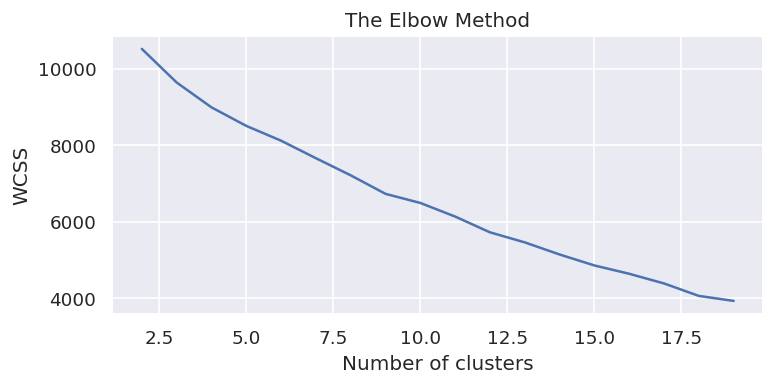

In [14]:
# vẽ biểu đồ cho giá trị wcss với k tương ứng
plt.plot(range(2, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
# Xác định số k tối ưu bằng Knee Locator
kl = KneeLocator(range(2, 20), wcss, curve="convex", direction="decreasing")
kl.elbow

12

Theo Elbow Method thì **Optimal K = 12**.

#### Silhouette Coefficient

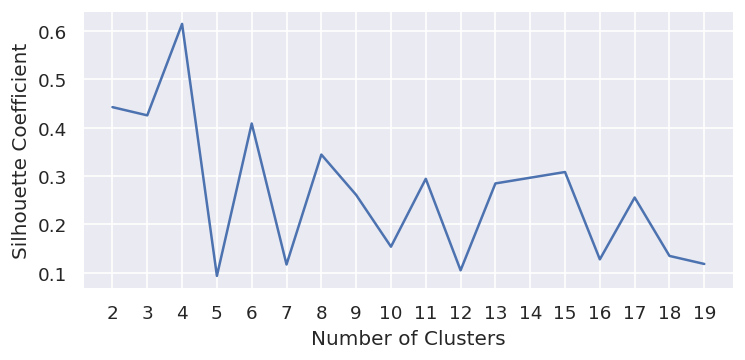

In [16]:
# Vẽ biểu đồ hệ số Silhouette
plt.plot(range(2, 20), sil)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Theo hệ số Silhouette thì **Optimal K = 4**.

#### Calinski Harabaz Index
Còn gọi là Tiêu Chuẩn Tỷ Số Phương Sai (Variance Ratio Criterion)

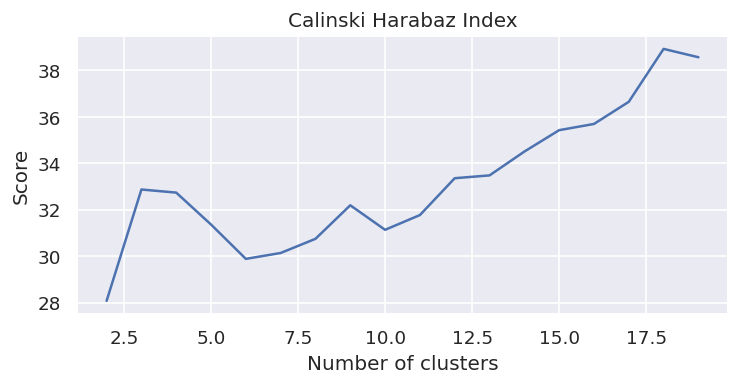

In [17]:
# vẽ biểu đồ chỉ số Calinski Harabaz với K tương ứng
plt.plot(range(2, 20), calinski)
plt.title('Calinski Harabaz Index')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

Theo hệ số Calinski thì **Optimal K = 18**.

## DBSCAN
Viết tắt của "*Density-Based Spatial Clustering of Applications with Noise*", là cách phân cụm dựa trên Density Model (Mô hình Mật Độ) đo bằng *Tỷ lệ giữa Tổng độ Phân Tán giữa các Cụm / Tổng độ Phân Tán trong các Cụm*.
> Xử lý tốt các data có nhiễu.

### Import Library & Module

In [18]:
# import module DBSCAN
from sklearn.cluster import DBSCAN

# import module tìm epsilon tối ưu
from sklearn.neighbors import NearestNeighbors

### Find Optimal Epsilon

In [19]:
# tạo biến chứa giá trị khoảng cách giữa các điểm dữ liệu với 2 điểm gần nhất
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(scaled_X)
distances, indices = nbrs.kneighbors(scaled_X)

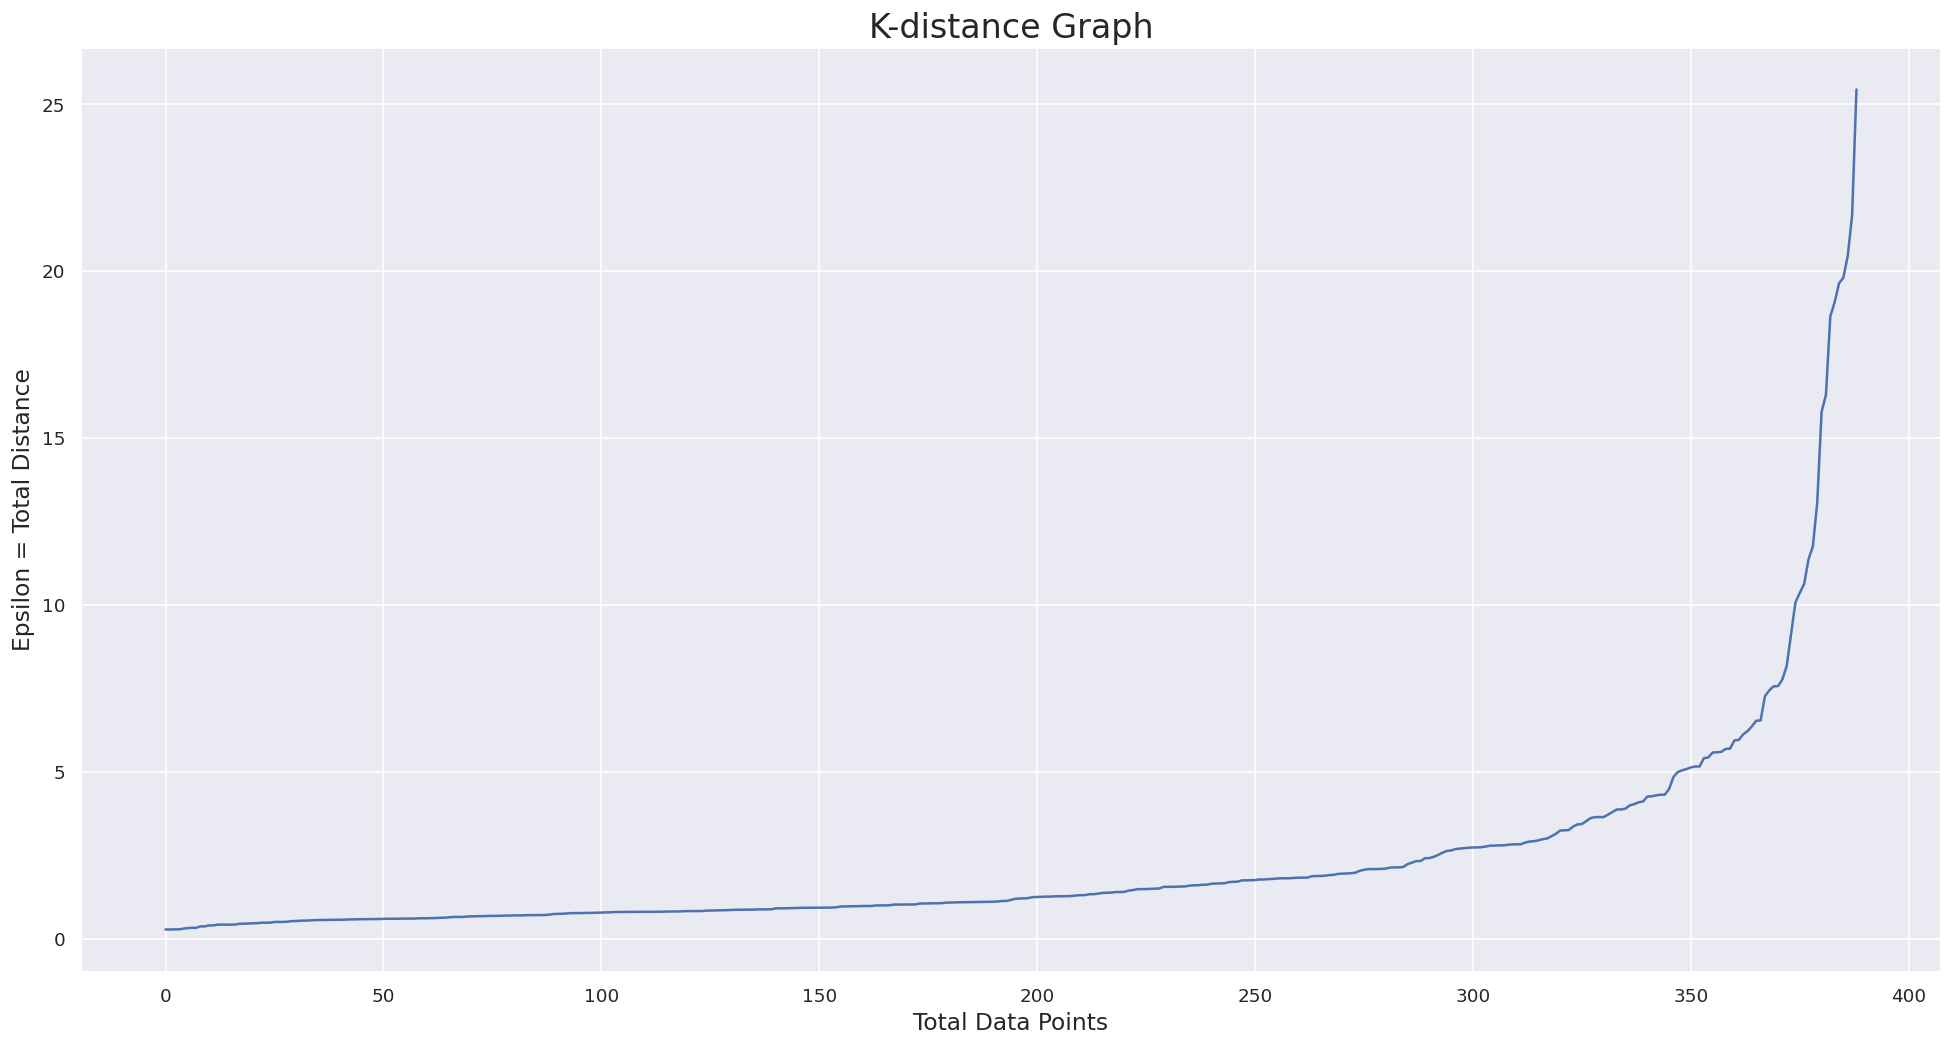

In [20]:
# Vẽ đồ thị K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Total Data Points',fontsize=14)
plt.ylabel('Epsilon = Total Distance',fontsize=14)
plt.show()

In [21]:
# Xác định số epsilon tối ưu bằng Knee Locator
epsilon = KneeLocator(range(389), distances, curve="convex", direction="increasing")
EPS = epsilon.knee_y
EPS

5.596916790629477

### Build model

In [22]:
# khởi tạo model với eps tối ưu và min_samples = 3 (quy tắc chung)
dbscan = DBSCAN(eps=EPS, min_samples=3)
db_labels = dbscan.fit_predict(scaled_X)

# kiểm tra
db_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
       -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0

In [23]:
# tính số lượng mỗi label
from collections import Counter
Counter(db_labels)

Counter({0: 358, -1: 31})

## RE-CLUSTERING

### Handle noise

Số lượng label "***-1***" tức Noise (nhiễu) là **31** trên tổng số 389 ~ **7.97 %**.
> Số lượng này không lớn nên chúng ta có thể loại bỏ nhiễu và tiến hành Cluster lại.

In [24]:
# lọc lấy ra các row không phải nhiễu
scaled_X1 = scaled_X[db_labels != -1]

### Find Optimal K
Sau đây chúng ta sẽ tính lại 3 metric phía trên sau khi đã loại bỏ nhiễu và xác định K tối ưu.

#### Hierarchical Clustering

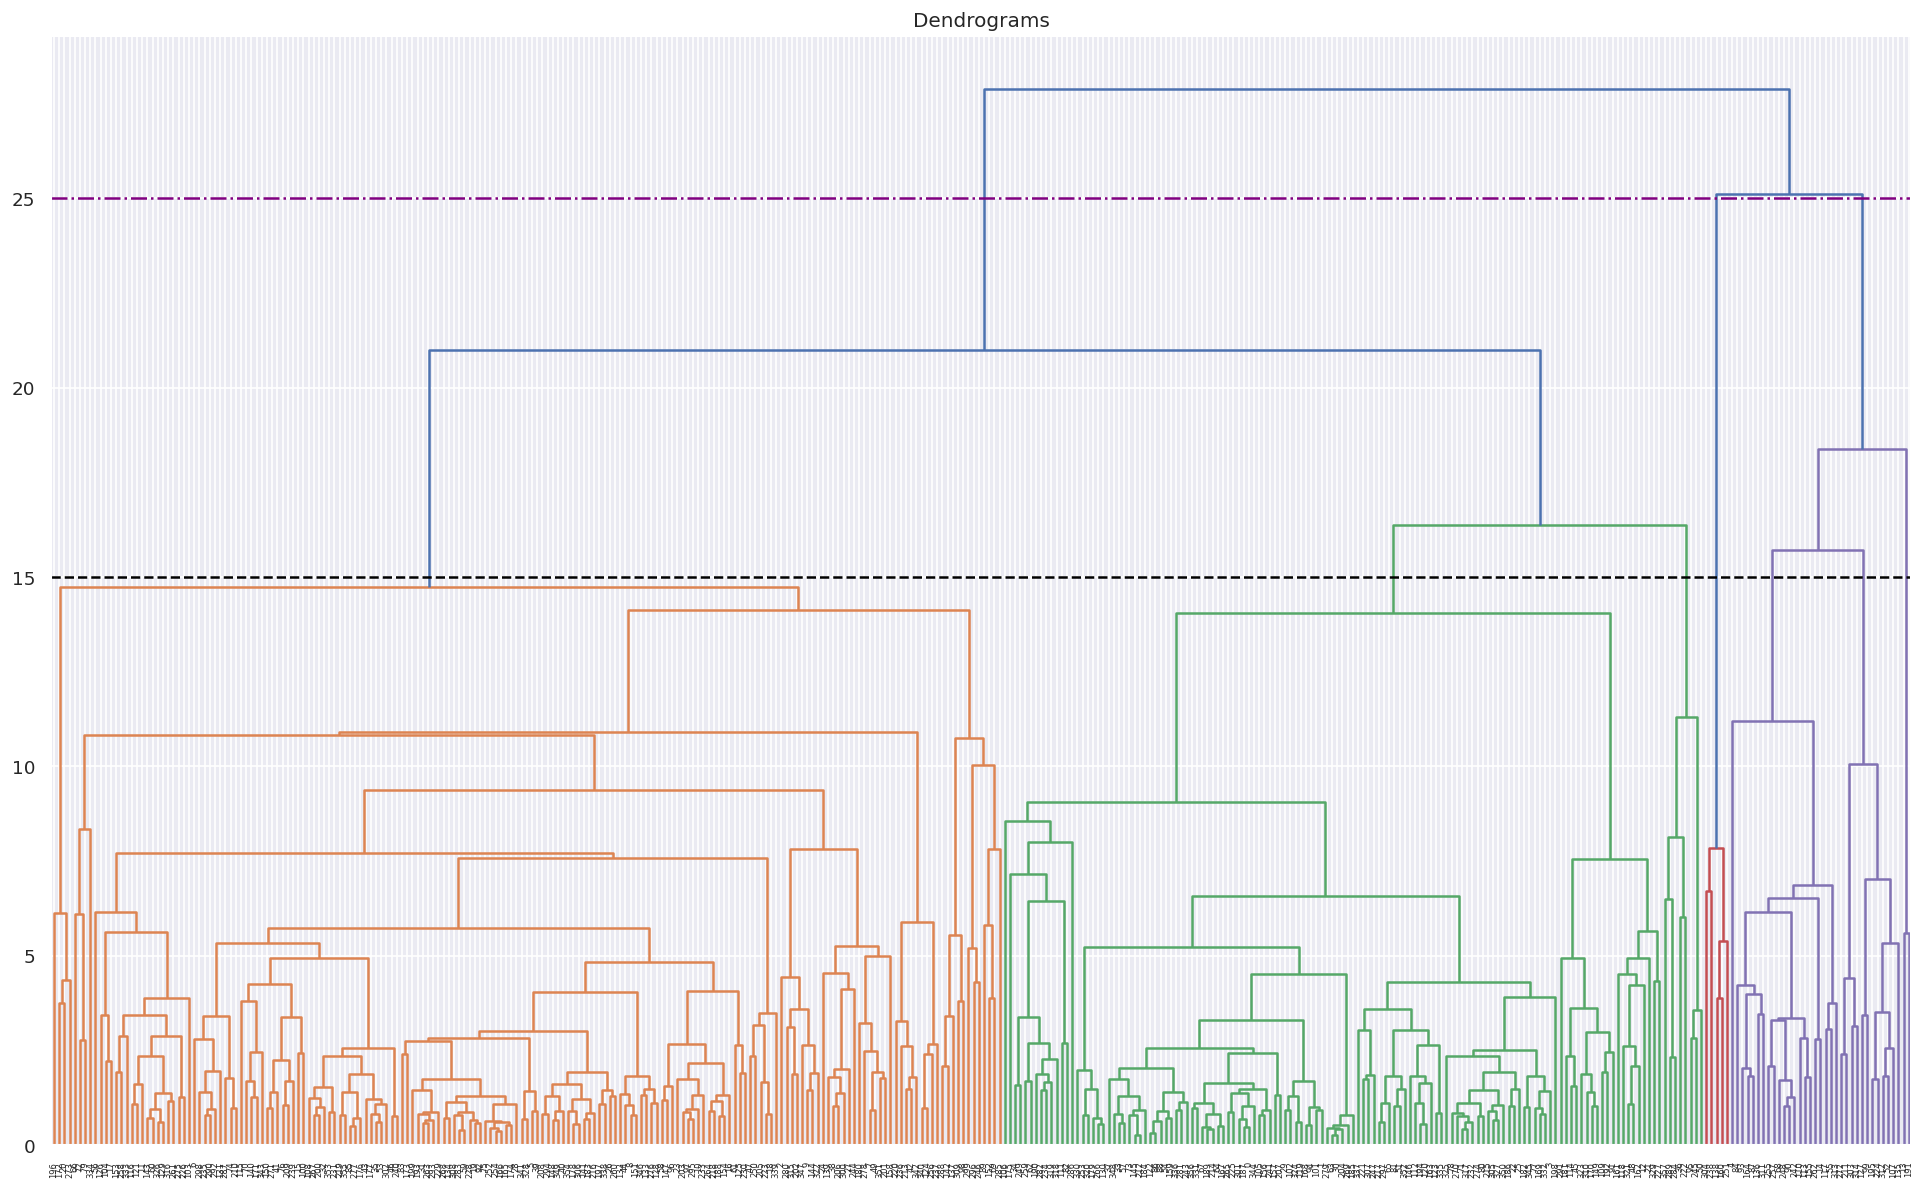

In [25]:
# vẽ biểu đồ các cụm
plt.figure(figsize=(20,12), dpi=120)
plt.title("Dendrograms")
dendro = shc.dendrogram(shc.linkage(scaled_X1, method='ward', metric='euclidean', optimal_ordering=True))

plt.axhline(y=15, color='black', linestyle='--')
plt.axhline(y=25, color='purple', linestyle='-.')

Có thể chọn **K1 = 3, 4 hoặc 5** dựa theo các đường màu cắt qua các cột chia ra các cụm tương đối tách biệt.

#### KMean Elbow Method

In [26]:
# tạo list lưu các metric tính được
sil1 = [] # cho hệ số silhouette của data không nhiễu
wcss1 = [] # cho chỉ số within clusters sum of square (elbow method) data không nhiễu
calinski1 = [] # cho điểm calinski của data không nhiễu

# tạo loop để build model cho các chỉ số k từ 2 > 20 và tính các hệ số trên với mỗi k
for k in range(2, 20):
 kmeans = KMeans(n_clusters = k, init='k-means++', max_iter=300, n_init=10, random_state=0)
 kmeans.fit(scaled_X1)

 sil_score = silhouette_score(scaled_X1, kmeans.labels_)
 sil1.append(sil_score)

 wcss1.append(kmeans.inertia_)

 cal_score = calinski_harabasz_score(scaled_X1, kmeans.labels_)
 calinski1.append(cal_score)

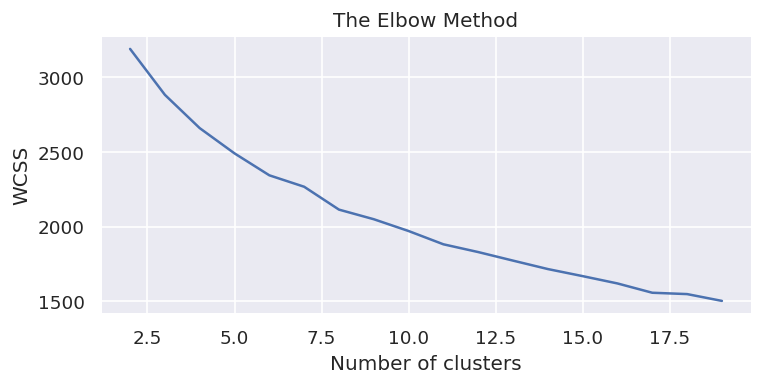

In [27]:
# vẽ biểu đồ cho giá trị wcss với k tương ứng
plt.plot(range(2, 20), wcss1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
# Xác định số k tối ưu bằng Knee Locator
kl = KneeLocator(range(2, 20), wcss1, curve="convex", direction="decreasing")
kl.elbow

8

Theo Elbow Method thì **Optimal K1 = 8**.

#### KMean Silhouette

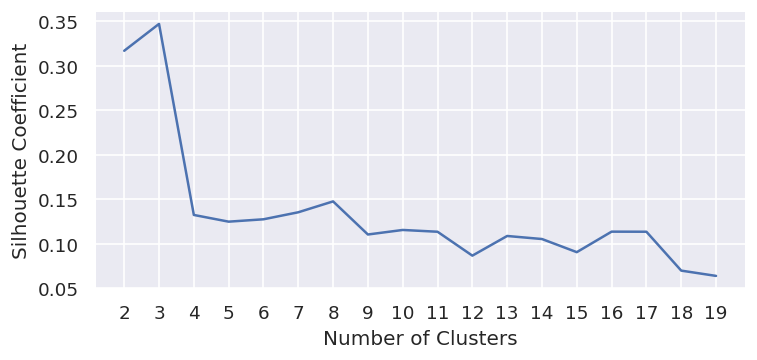

In [29]:
# Vẽ biểu đồ hệ số Silhouette
plt.plot(range(2, 20), sil1)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Theo hệ số Silhouette thì **Optimal K1 = 3**.

#### KMean Calinski Harabaz
Còn gọi là Tiêu Chuẩn Tỷ Số Phương Sai (Variance Ratio Criterion)

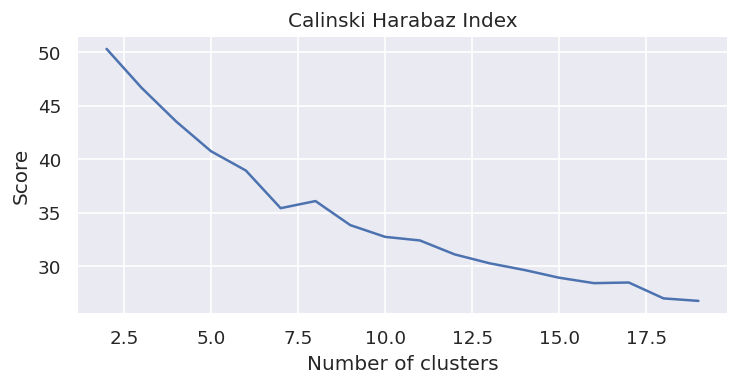

In [30]:
# vẽ biểu đồ chỉ số Calinski Harabaz với K tương ứng
plt.plot(range(2, 20), calinski1)
plt.title('Calinski Harabaz Index')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

Theo hệ số Calinski Harabaz thì **Optimal K1 = 3**.

> Như vậy sau khi loại bỏ nhiễu chúng ta có kết quả **Optimal K = 3** tức là trong số các Công ty ban đầu ta có **3 Cụm Chính** và *1 Nhóm Nhiễu*.

### Re-Modeling
Xây dựng Model với K tối ưu và tiến hành phân cụm và với gắn label cho các điểm dữ liệu khác nhiễu.

In [31]:
# build model KMean cho 3 cụm
kmeans = KMeans(n_clusters = 3, init='k-means++', max_iter=300, n_init=10, random_state=0)

# train model và predict label với data không nhiễu
cluster = kmeans.fit_predict(scaled_X1)

In [32]:
# xem số lượng các label mới
Counter(cluster)

Counter({0: 300, 2: 52, 1: 6})

In [33]:
# thay các label "0" cũ bằng các label mới
db_labels[db_labels==-0] = cluster

# kiểm tra
Counter(db_labels)

Counter({0: 300, 2: 52, -1: 31, 1: 6})

In [34]:
# add thêm cột class vào bảng dataFrame ban đầu
fdf['Cluster'] = db_labels

# kiểm tra
fdf.sample(5)

,Mã,Công ty,Ngành,Khối lượng NY/ĐKGD,TtDT_QG4_YoY,TtDT_QG3_YoY,TtDT_QG2_YoY,TtDT_QG1_YoY,TtLN_QG4_YoY,TtLN_QG3_YoY,...,TtEPS_QG3,TtEPS_QG2,TtEPS_QG1,TtBVPS_QG3,TtBVPS_QG2,TtBVPS_QG1,TtPE_QG3,TtPE_QG2,TtPE_QG1,Cluster
229,PGC,Tổng Công ty Gas Petrolimex-Công ty Cổ phần,Phân phối xăng dầu & khí đốt,60342638,0.196572,-2.479148,-26.949456,-17.946015,11.526339,-6.818922,...,-1.740428,-2.536052,-12.580806,3.572763,2.466552,4.873309,-5.443787,-4.615385,8.402367,0
307,TCO,Công ty Cổ phần Vận tải đa phương thức Duyên Hải,Dịch vụ vận tải,18711000,5.541605,-96.786497,-97.790613,-98.157771,-210.826428,-57.908928,...,-5.085575,-8.655257,-1.515892,-1.919896,-2.297968,-2.185728,8.401084,12.737127,68.834688,0
277,SIP,Công ty Cổ phần Đầu tư Sài Gòn VRG,Bất động sản,181807923,-0.596682,-5.561532,3.267375,13.028211,57.290226,-27.820010,...,-6.499545,-7.763065,-10.603457,5.010801,-0.300449,-47.096069,40.029112,81.077147,-0.145560,2
327,TN1,CÔNG TY CỔ PHẦN THƯƠNG MẠI DỊCH VỤ TNS HOLDINGS,Bất động sản,49665950,57.778850,22.085896,-1.511666,46.713955,101.682286,-259.567816,...,-66.356011,-66.946257,-53.463809,-5.043147,-2.700195,1.057808,118.276762,110.443864,46.344648,0
256,REE,Công ty Cổ phần Cơ điện lạnh,Máy công nghiệp,409714260,61.771526,15.812120,7.475175,-12.158498,-9.169751,7.463182,...,-1.242782,-8.260105,-19.332162,3.052447,-9.203589,-7.133475,-4.342984,-0.668151,9.576837,0


In [35]:
fdf['Cluster'].value_counts()

 0    300
 2     52
-1     31
 1      6
Name: Cluster, dtype: int64

# CLUSTERS ANALYSIS
Phần này chúng ta sẽ phân tích đặc điểm từng Cụm (không xét Nhiễu) để nhận diện đặc trưng.

### Distribution
Về mặt Phân Bố

<ipython-input-36-89920af26b3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Cluster', data=fdf, palette=palette)


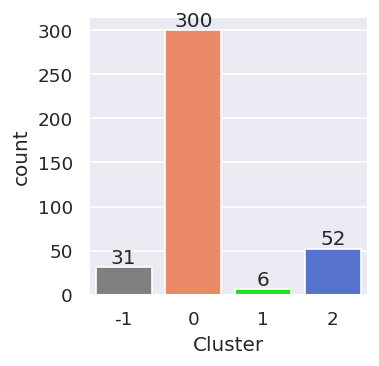

In [36]:
# vẽ biểu đồ thể hiện số lượng mỗi cụm
palette = ['grey', 'coral', 'lime', 'royalblue']
plt.figure(figsize=(3,3))
ax = sns.countplot(x='Cluster', data=fdf, palette=palette)
for bar in ax.containers:
    ax.bar_label(bar)

- Cụm 0 chiếm số lượng nhiều nhất, sau đó là Cụm 2.
- Cụm 1 chiếm số lượng ít nhất.

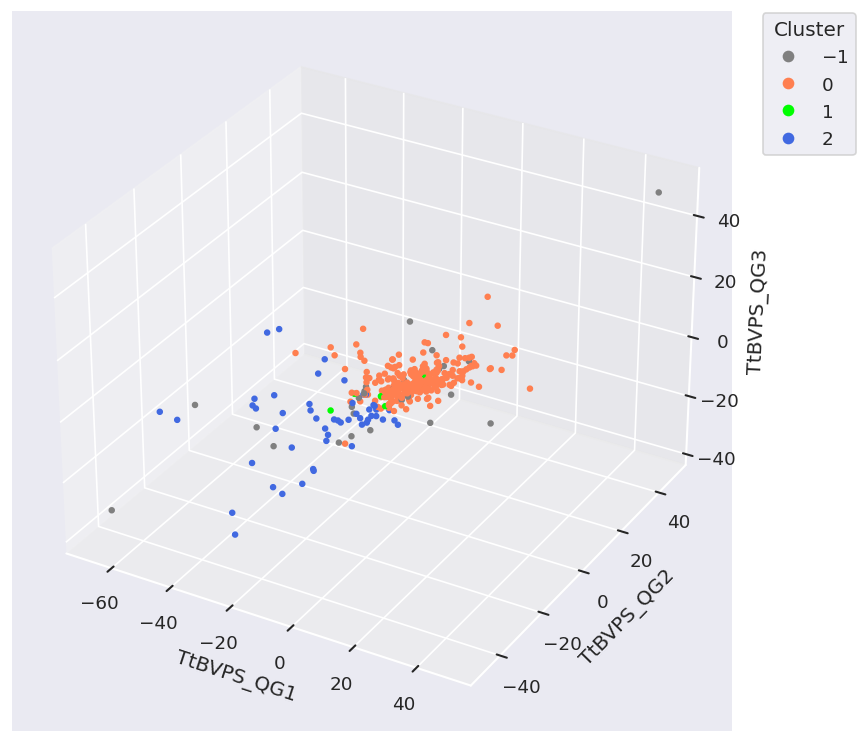

In [37]:
# impotr các thư viện hỗ trợ vẽ 3D
import requests_oauthlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# lấy dữ liệu là các chỉ số muốn quan sát
x = fdf['TtBVPS_QG1']
y = fdf['TtBVPS_QG2']
z = fdf['TtBVPS_QG3']

# dựng các trục (axes)
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# chuyển colormap từ seaborn sang mathplotlib
cmap = ListedColormap(sns.color_palette(palette).as_hex())

# vẽ biểu đồ scatter 3D
sc = ax.scatter(x, y, z, s=33, c=[i for i in fdf['Cluster']], cmap=cmap, marker='.', alpha=1)
ax.set_xlabel('TtBVPS_QG1')
ax.set_ylabel('TtBVPS_QG2')
ax.set_zlabel('TtBVPS_QG3')

# thể hiện legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.03, 1.01), loc=2, title = 'Cluster')

In [38]:
# import thư viện vẽ biểu đồ 3D interactive
import plotly.express as px

# tạo DataFrame chứa các tham số cần thể hiện
pdf = fdf[['TtTV_QG1','TtTV_QG2','TtTV_QG3','Cluster']]
pdf['Cluster'] = pdf['Cluster'].astype(str)

# tạo dict chứa các màu như palette để vẽ map với đồ thị
color_dict = { '-1':'grey', '0':'coral', '1':'lime', '2':'royalblue'}

# tạo object biểu đồ scatter 3D
figure = px.scatter_3d(pdf, x='TtTV_QG1', y='TtTV_QG2', z='TtTV_QG3', color="Cluster",
			color_discrete_map=color_dict,
			title="3D Scatter Plot with TtTV",
			labels={"TtTV_QG1": "TtTV_QG1", "TtTV_QG2": "TtTV_QG2", "TtTV_QG3": "TtTV_QG3"})

# thể hiện đồ thị
figure.show()

<ipython-input-38-0fbe315879ef>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['Cluster'] = pdf['Cluster'].astype(str)


## Characteristic
Phân tích đặc trưng các Cụm thể hiện qua các chỉ số

### Revenue
Về mặt Tăng trưởng Doanh thu

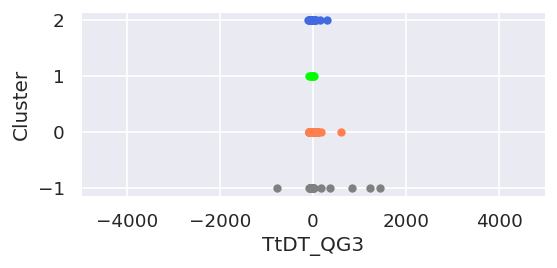

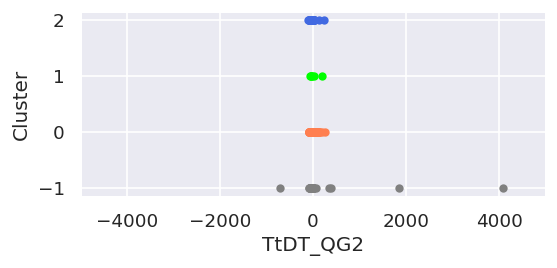

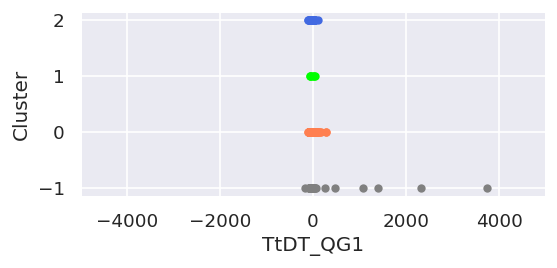

In [39]:
# vẽ biểu đồ thể hiện tăng doanh thu Quý gần thứ 3 (Quý sau Quý đầu kỳ) trong khoảng [-5000, 5000]
plt.figure(figsize=(5,2))
plt.xlim(-5000, 5000)
sns.stripplot(data=fdf, x='TtDT_QG3', y='Cluster', hue="Cluster",
              palette=palette, legend=False, native_scale=True, dodge=True)
plt.show()

# vẽ biểu đồ thể hiện tăng trưởng doanh thu Quý gần thứ 2 trong khoảng [-5000, 5000]
plt.figure(figsize=(5,2))
plt.xlim(-5000, 5000)
sns.stripplot(data=fdf, x='TtDT_QG2', y='Cluster', hue="Cluster",
              palette=palette, legend=False, native_scale=True, dodge=True)
plt.show()

# vẽ biểu đồ thể hiện tăng trưởng doanh thu Quý gần nhất trong khoảng [-5000, 5000]
plt.figure(figsize=(5,2))
plt.xlim(-5000, 5000)
sns.stripplot(data=fdf, x='TtDT_QG1', y='Cluster', hue="Cluster",
              palette=palette, legend=False, native_scale=True, dodge=True)
plt.show()

> Cả 3 Cụm 0, 1, 2 không biến động nhiều về mặt doanh thu trong 3 quý gần đây.

### Profitability
Về mặt Tăng trưởng Lợi Nhuận

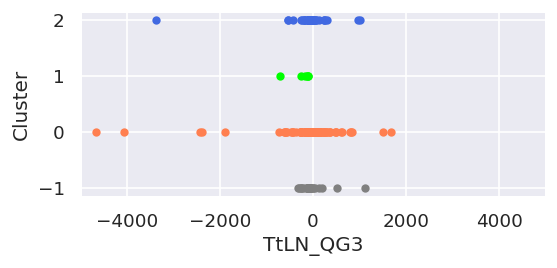

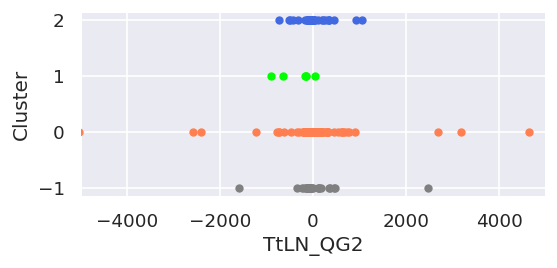

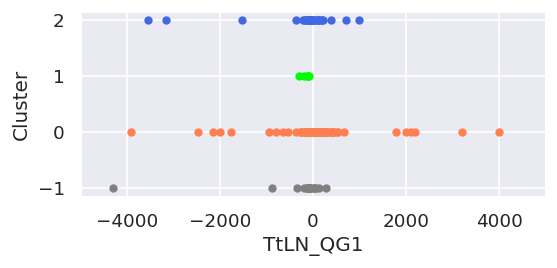

In [40]:
# vẽ biểu đồ thể hiện tăng trưởng lợi nhuận Quý gần thứ 3 (Quý sau Quý đầu kỳ) trong khoảng [-5000, 5000]
plt.figure(figsize=(5,2))
plt.xlim(-5000, 5000)
sns.stripplot(data=fdf, x='TtLN_QG3', y='Cluster', hue="Cluster",
              palette=palette, legend=False, native_scale=True, dodge=True)
plt.show()

# vẽ biểu đồ thể hiện tăng trưởng lợi nhuận Quý gần thứ 2 trong khoảng [-5000, 5000]
plt.figure(figsize=(5,2))
plt.xlim(-5000, 5000)
sns.stripplot(data=fdf, x='TtLN_QG2', y='Cluster', hue="Cluster",
              palette=palette, legend=False, native_scale=True, dodge=True)
plt.show()

# vẽ biểu đồ thể hiện tăng trưởng lợi nhuận Quý gần nhất trong khoảng [-5000, 5000]
plt.figure(figsize=(5,2))
plt.xlim(-5000, 5000)
sns.stripplot(data=fdf, x='TtLN_QG1', y='Cluster', hue="Cluster",
              palette=palette, legend=False, native_scale=True, dodge=True)
plt.show()

- Cụm 0 tỷ lệ tăng trưởng/giảm Lợi Nhuận nhiều nhất và có biên độ dao động rất lớn.
- Cụm 1 không có sự gia tăng về lợi nhuận.
- Cụm 2 với mức tăng ổn định và biên độ biến động ít hơn, tuy nhiên trong Cụm cũng có sự phân hóa nhất định.

### Liability
Về mặt Gia tăng Nợ Phải Trả

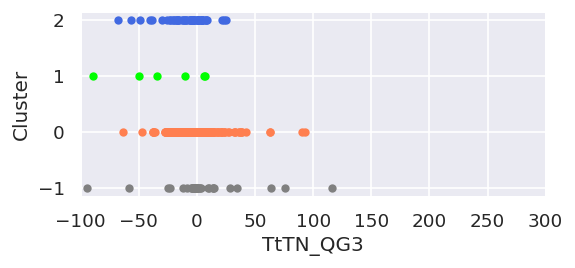

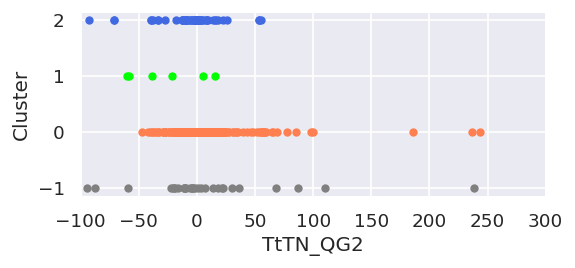

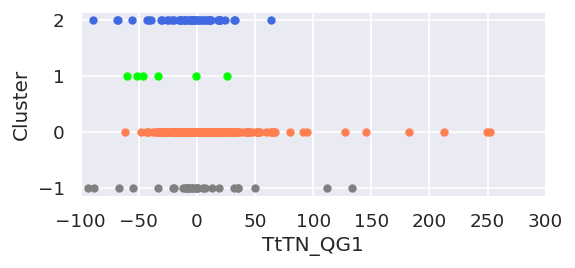

In [41]:
# vẽ biểu đồ thể hiện tăng trưởng tổng số nợ Quý gần thứ 3 (Quý sau Quý đầu kỳ) trong phạm vi [-100, 300]
plt.figure(figsize=(5,2))
plt.xlim(-100,300)
sns.stripplot(data=fdf, x='TtTN_QG3', y='Cluster', hue="Cluster",
              palette=palette, legend=False, native_scale=True, dodge=True)
plt.show()

# vẽ biểu đồ thể hiện tăng trưởng tổng số nợ Quý gần thứ 2 trong phạm vi [-100, 300]
plt.figure(figsize=(5,2))
plt.xlim(-100,300)
sns.stripplot(data=fdf, x='TtTN_QG2', y='Cluster', hue="Cluster",
              palette=palette, legend=False, native_scale=True, dodge=True)
plt.show()

# vẽ biểu đồ thể hiện tăng trưởng tổng số nợ Quý gần nhất trong phạm vi [-100, 300]
plt.figure(figsize=(5,2))
plt.xlim(-100,300)
sns.stripplot(data=fdf, x='TtTN_QG1', y='Cluster', hue="Cluster",
              palette=palette, legend=False, native_scale=True, dodge=True)
plt.show()

- Cụm 0 có xu hướng tăng dần tổng số nợ.
- Cụm 1 có xu hướng giảm chậm.
- Cụm 2 giảm đáng kể và dần đều.

### EPS
Về Thu nhập trên mỗi Cổ phần

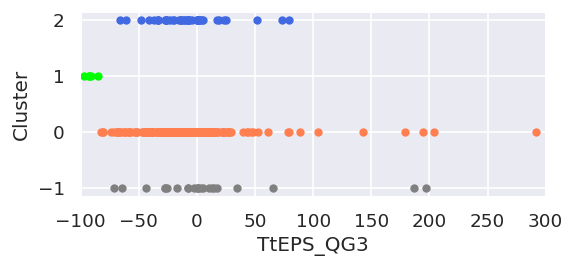

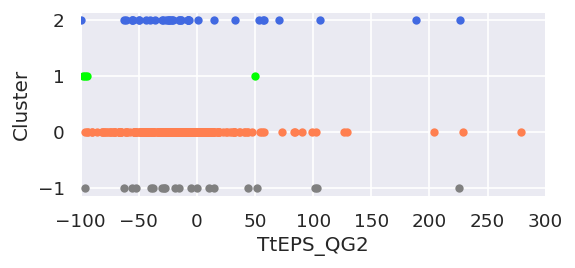

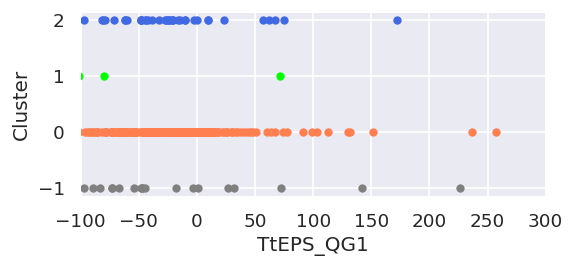

In [42]:
# vẽ biểu đồ thể hiện tăng trưởng tổng số nợ Quý gần thứ 3 (Quý sau Quý đầu kỳ) trong phạm vi [-100, 300]
plt.figure(figsize=(5,2))
plt.xlim(-100,300)
sns.stripplot(data=fdf, x='TtEPS_QG3', y='Cluster', hue="Cluster",
              palette=palette, legend=False, native_scale=True, dodge=True)
plt.show()

# vẽ biểu đồ thể hiện tăng trưởng tổng số nợ Quý gần thứ 2 trong phạm vi [-100, 300]
plt.figure(figsize=(5,2))
plt.xlim(-100,300)
sns.stripplot(data=fdf, x='TtEPS_QG2', y='Cluster', hue="Cluster",
              palette=palette, legend=False, native_scale=True, dodge=True)
plt.show()

# vẽ biểu đồ thể hiện tăng trưởng tổng số nợ Quý gần nhất trong phạm vi [-100, 300]
plt.figure(figsize=(5,2))
plt.xlim(-100,300)
sns.stripplot(data=fdf, x='TtEPS_QG1', y='Cluster', hue="Cluster",
              palette=palette, legend=False, native_scale=True, dodge=True)
plt.show()

- Cụm 0 không có thay đổi đáng kể.
- Cụm 1 không có thay đổi đáng kể và trong cả 3 Quý đều tăng trưởng ÂM.
- Cụm 2 tăng nhiều nhất và khoảng 40% tăng trưởng DƯƠNG trong cả 3 Quý.

### PE
Về Tỷ lệ Thị giá/Thu nhập

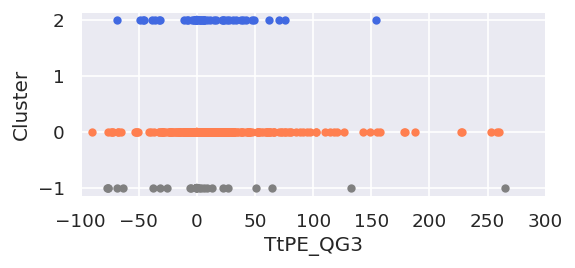

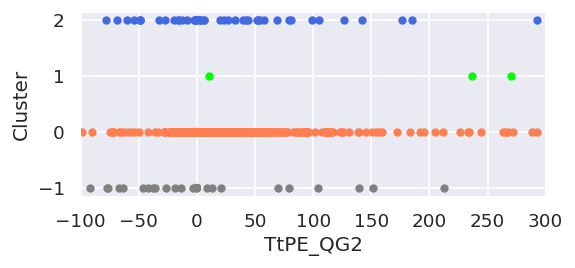

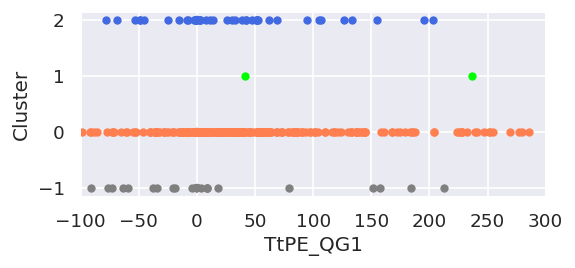

In [43]:
# vẽ biểu đồ thể hiện tăng trưởng tổng số nợ Quý gần thứ 3 (Quý sau Quý đầu kỳ) trong phạm vi [-100, 300]
plt.figure(figsize=(5,2))
plt.xlim(-100,300)
sns.stripplot(data=fdf, x='TtPE_QG3', y='Cluster', hue="Cluster",
              palette=palette, legend=False, native_scale=True, dodge=True)
plt.show()

# vẽ biểu đồ thể hiện tăng trưởng tổng số nợ Quý gần thứ 2 trong phạm vi [-100, 300]
plt.figure(figsize=(5,2))
plt.xlim(-100,300)
sns.stripplot(data=fdf, x='TtPE_QG2', y='Cluster', hue="Cluster",
              palette=palette, legend=False, native_scale=True, dodge=True)
plt.show()

# vẽ biểu đồ thể hiện tăng trưởng tổng số nợ Quý gần nhất trong phạm vi [-100, 300]
plt.figure(figsize=(5,2))
plt.xlim(-100,300)
sns.stripplot(data=fdf, x='TtPE_QG1', y='Cluster', hue="Cluster",
              palette=palette, legend=False, native_scale=True, dodge=True)
plt.show()

- Cụm 0 tăng trưởng nhiều nhất và nhanh nhất, tuy nhiên cũng có nhiều Công ty suy giảm nhất.
- Cụm 1 có ít công ty tăng trưởng nhất.
- Cụm 2 tăng nhiều và ổn định nhất, chiếm tỷ lệ trong Cụm cao nhất.

## Remarks
Nhận xét các kết quả phân tích được

Qua một vài chỉ số chính như trên ta có thể rút ra đặc trưng các Cụm (Nhóm) Công ty trên sàn HOSE như sau:

- Cụm 0:

  - Tăng trưởng nhiều về mặt doanh thu và cả tổng số nợ. Tuy nhiên mức lợi nhuận chưa có sự gia tăng tương xứng.
  - Các chỉ số tăng trưởng/suy giảm với biên độ lớn và không rõ ràng.
  - Đánh giá thị trường khá tích cực thể hiện qua chỉ số PE đa số là tăng dần. Tuy nhiên EPS đa số giảm đều phản ánh thực tế Các Cty nhóm này chưa hoạt động hiệu quả.

> Nhận xét: Cụm này đặc trưng chính là tính **Biến Động**, thể hiện trọng tâm là đầu tư phát triển dù có phụ thuộc vào vay mượn bên ngoài và chấp nhận lợi nhuận thấp/tăng trưởng chậm. Đây là điểm thường thấy ở những **Công ty non trẻ mới tham gia thị trường**.

> Đề xuất: Cân nhắc theo dõi thêm trong 1 thời gian vừa phải trước khi tiến hành cho vay/đầu tư trái phiếu/cổ phiếu ...

- Cụm 1:

  - Không có sự tăng trưởng nào đáng kể về doanh thu hay lợi nhuận.
  - về mặt đánh giá thị trường không mấy tích cực, phản ánh qua EPS giảm đều theo thời gian và PE không có thay dổi nhiều.
  - Tuy nhiên điểm sáng Cụm này là tổng số nợ giảm dần theo thời gian.

>Nhận xét: Cụm này đặc trưng chính là sự **Ổn Định**, thể hiện trọng tâm là sử dụng hiệu quả nguồn vốn tự có và giảm sự phụ thuộc vào vay mượn bên ngoài, dù có thể ảnh hưởng lợi nhuận. Đây là điểm thường thấy ở những **Công ty lâu đời dày dạn kinh nghiệm**.

>Đề xuất: Phù hợp với việc cho vay thông thường.

- Cụm 2:

  - Tăng trưởng đều về doanh thu và lợi nhuận song song với giảm dần tổng số nợ theo thời gian.
  - Đánh giá thị trường nói chung tích cực, phản ánh qua EPS và PE tăng dần qua thời gian.

>Nhận xét: Cụm này đặc trưng chính là sự **Phát Triển**, thể hiện trọng tâm là sử dụng hiệu quả nguồn vốn tự có song song giảm sự phụ thuộc vào vay mượn bên ngoài. Đây là điểm thường thấy ở những **Công ty trưởng thành đang chiếm lĩnh thị trường**.

>Đề xuất: Đây là Nhóm cần chú ý nhất, phù hợp với việc cho vay thông thường lẫn đầu tư trái phiếu/cổ phiếu hay dạng khác.

## Cluster 2 Revisited
Xem lại chi tiết các Công ty Cluster 2 là Nhóm phát triển tốt nhất.

[Text(0, 0, '10'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

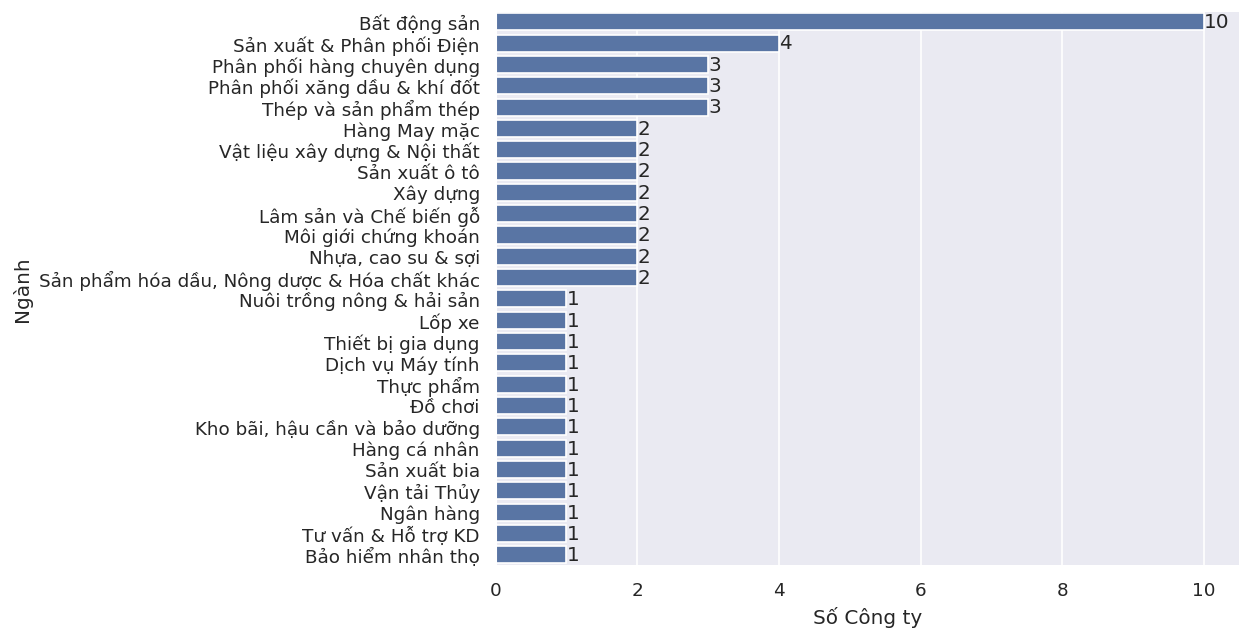

In [44]:
# tạo dataframe chứa thông tin các Công ty trong Cluster 2
cluster_2 = fdf[fdf['Cluster'] == 2]

# xem chi tiết các Nhóm ngành trong Cluster 2 theo số lượng Cty giảm dần
plt.figure(figsize=(8,6))
ax = sns.countplot(y = 'Ngành', data = cluster_2, order=cluster_2['Ngành'].value_counts().index)
ax.set_xlabel('Số Công ty')
ax.bar_label(ax.containers[0])

Nhóm các Công ty chiếm đa số (>=3) là Nhóm DV Phân phối & Hậu cần, Nhóm BĐS và Nhóm Công ty Thép .

In [45]:
# tạo array tính số lượng Công ty trong mỗi Ngành của Cluster 2
arr = cluster_2.groupby(['Ngành']).size()

# lấy ra các Ngành có ít nhất 3 Công ty
industries = list(arr[arr >= 3].index)

# xem Công ty này
cluster_2[cluster_2['Ngành'].isin(industries)].iloc[:,:4]

,Mã,Công ty,Ngành,Khối lượng NY/ĐKGD
4,ABS,Công ty Cổ phần Dịch vụ Nông nghiệp Bình Thuận,Phân phối hàng chuyên dụng,80000000
13,AGG,CTCP Đầu tư và Phát triển Bất động sản An Gia,Bất động sản,125118368
58,CNG,Công ty Cổ phần CNG Việt Nam,Phân phối xăng dầu & khí đốt,35099625
71,D2D,Công ty Cổ phần Phát triển Đô thị Công nghiệp ...,Bất động sản,30304758
99,DTL,Công ty Cổ phần Đại Thiên Lộc,Thép và sản phẩm thép,61435604
113,FIR,Công ty Cổ phần Địa ốc First Real,Bất động sản,64245281
117,FRT,Công ty cổ phần Bán lẻ Kỹ thuật số FPT,Phân phối hàng chuyên dụng,136242389
140,HDC,Công ty Cổ phần Phát triển nhà Bà Rịa-Vũng Tàu,Bất động sản,135104881
149,HPX,Công ty cổ phần Đầu tư Hải Phát,Bất động sản,304168581
152,HSG,Công ty Cổ phần Tập đoàn Hoa Sen,Thép và sản phẩm thép,615982309


Có thể liệt kê ra một số cái tên quen thuộc trong Danh sách trên như FPT, BĐS An Gia, Thép Hoa Sen ...

# VERIFICATION with Stock Price

In [46]:
# import module chuyên lưu trữ số liệu chứng khoán của VietStock
!pip install vnstock
from vnstock import *

In [47]:
# lấy số liệu chứng khoán của 2 ngày: ngày đầu T10/2023 và đầu T1/2024 (nếu có)
# tính ra % gia tăng của thị giá sau 3 tháng của mỗi Cp trong Ds
for tck in fdf['Mã']:
  try:
    sdt = stock_historical_data(symbol=tck, start_date="2023-10-01", end_date="2024-01-01")
    fdf.loc[fdf['Mã']==tck,'%Tt_Stock_Price'] = (int(sdt[-1:].close)/int(sdt[:1].close) - 1)*100
  except:
    fdf.loc[fdf['Mã']==tck,'%Tt_Stock_Price'] = 0

In [48]:
# lấy ra dữ liệu của 100 mã Cp tăng nhiều nhất sau 3 tháng
sdf = fdf.loc[fdf['%Tt_Stock_Price']>0].sort_values('%Tt_Stock_Price', ascending=False)[:100]

<ipython-input-49-03ed90a19ba9>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Cluster', ylabel='%Tt_Stock_Price'>

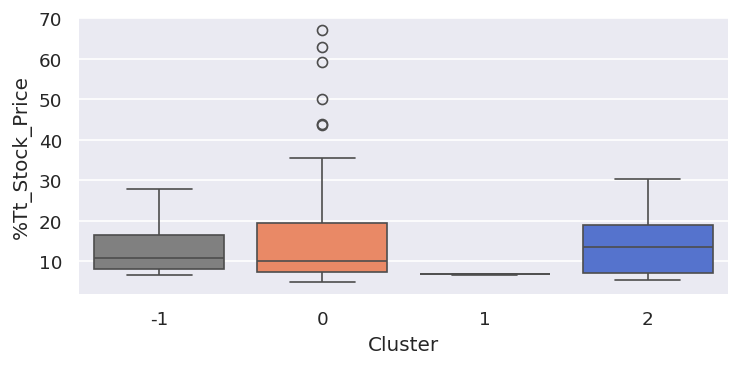

In [49]:
# vẽ biểu đồ biên độ dao động giá 100 Cp này
sns.boxplot(data=sdf, x='Cluster', y='%Tt_Stock_Price', palette=palette)

In [50]:
# impotr module vẽ plot treemap
!pip install squarify
import squarify

<Axes: >

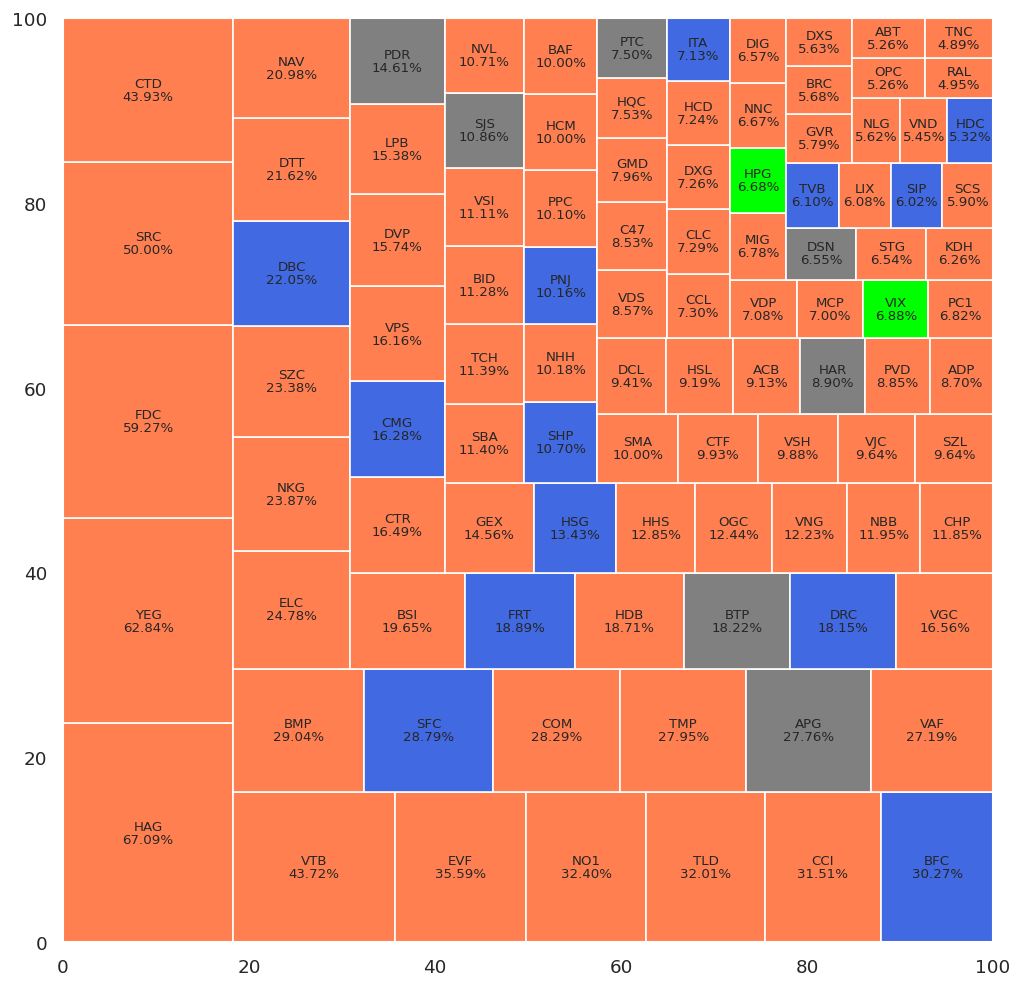

In [51]:
# vẽ biểu đồ treemap thể hiện các 100 mã Cp trên
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 8})
scolors = [palette[i+1] for i in sdf['Cluster']]
perc = [f'{i:4.2f}%' for i in sdf['%Tt_Stock_Price']]
squarify.plot(sizes=sdf['%Tt_Stock_Price'], label=sdf['Mã'], value=perc, alpha=1, color=scolors)

> Có 33% Công ty trong Cụm 2 có thị giá tăng sau 3 tháng kể từ thời điểm cuối cùng trong dataset ban đầu, chứng tỏ kết quả phân Cụm khá hợp lý và các chỉ số hiệu quả hoạt động trong báo cáo tài chính cũng phần nào ảnh hưởng lên đánh giá của thị trường và tác động lên thị giá Cp.

# CONCLUSION
Phần này đưa ra các kết luận & nhận xét thu được sau quá trình thực hiện toàn bộ Project như sau:

> **VỀ SCRAPING**

1. Với web static: data dạng bảng > get_html(), data khác thì dùng BS4.
2. Với web dynamic: dùng Selenium.
3. Trong khi scrape chú ý nghỉ gián đoạn với sleep().

> **VỀ THUẬT TOÁN**

1. Với data phân bố rõ ràng > Kmean & Hierarchical: dễ thực hiện & nhanh.
2. Với data có nhiễu > DBSCAN: nhận diện được nhiễu & loại bỏ nhiễu.
3. Nên sử dụng ít nhất 3 Model & 3 Metric để so sánh và chọn ra K tối ưu. Sau đó mới tiến hành phân cụm và gắn label.

> **VỀ ỨNG DỤNG**

Dựa vào nhu cầu và tình hình thực tế chúng ta có thể cân nhắc một số đề xuất sau:

1. Với NLĐ tìm sự nghiệp ổn định > Công ty Cụm 1.
2. Với NLĐ muốn thăng tiến & lương cao > Công ty Cụm 2.
3. Với NĐT cá nhân thích mạo hiểm & lời nhanh > Công ty Cụm 3 !
4. Với Ngân Hàng Thương Mại tìm kiếm KH cho lợi nhuận ổn định > Cụm 1.
5. Với NH Đầu Tư hay Quỹ ĐT kỳ vọng lợi nhuận lớn > Cụm 3 !